In [7]:
import numpy as np
import analysis_utils as au
import eDiskplot as eplot
from eDisk_source_dict import source_dict
from astropy.visualization import AsinhStretch, ImageNormalize
from qdisk.classes import FitsImage
from qdisk.utils import plot_2D_map
from qdisk.model import Keplerian_velocity
from qdisk.plot import plot_channel_map
import matplotlib.pyplot as plt
%matplotlib widget
%load_ext autoreload
%autoreload 2



plt.rcParams.update({
    "xtick.top": True,
    "ytick.right": True,
    "xtick.direction": "out",
    "ytick.direction": "out"})

    
source = "L1489IRS"
center_coord = source_dict[source]["radec"]
vsys = source_dict[source]["v_sys"]
vrange = 5.3
norm_kwargs = {"M0": dict(stretch=AsinhStretch(a=0.1), vmin=0.0),
               "M1": dict(vmin=vsys-vrange, vmax=vsys+vrange),
               "M8": dict()}

PA0 = 69
incl = 70
d = 140

x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)
v0 = 1.0

xx, yy = np.meshgrid(x, y)

rr = np.hypot(xx, yy)


incl = np.radians(incl)
PA0 = np.radians(PA0)

alpha = 0.2
beta = 1
PA = np.arctan2(1., alpha*rr**beta + 1./np.tan(PA0))

x_proj = xx * np.sin(PA) + yy * np.cos(PA)
y_proj = (-xx * np.cos(PA) + yy * np.sin(PA)) / np.cos(
    incl
)  # follow the formulation in Yen et al. 2016

# polar coordinate
r = np.sqrt(x_proj**2 + y_proj**2)  # in arcsec
theta = np.degrees(
    np.arctan2(y_proj, x_proj)
        )  # in degree, [-180, 180]

vkep = Keplerian_velocity(r=r, theta=theta, Mstar=1.6, distance=146, incl=incl)


# v = v0 * np.sin(incl) * np.cos(np.radians(theta))



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def warped_disk_v0(x, y, Mstar, PA0, incl, vsys, alpha=0.2, beta=2):
    xx, yy = np.meshgrid(x, y)
    rr = np.hypot(xx, yy)

    # incl = np.radians(incl)
    PA0 = np.radians(PA0)

    # alpha = 0.2
    # beta = 1
    PA = np.arctan2(1., alpha*rr**beta + 1./np.tan(PA0))

    x_proj = xx * np.sin(PA) + yy * np.cos(PA)
    y_proj = (-xx * np.cos(PA) + yy * np.sin(PA)) / np.cos(
        np.radians(incl)
    )  # follow the formulation in Yen et al. 2016

    # polar coordinate
    r = np.sqrt(x_proj**2 + y_proj**2)  # in arcsec
    theta = np.degrees(
        np.arctan2(y_proj, x_proj)
            )  # in degree, [-180, 180]

    vlos = - Keplerian_velocity(r=r, theta=theta, Mstar=Mstar, distance=146, incl=incl) + vsys

    return vlos
    

In [4]:
#C18O rotation map
source = "L1489IRS"
config = "SBLB"
line = "C18O"
imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=1.0)

v0image = au.VADPpath + au.get_image_basename(source, config, line, robust=1.0).replace(
        ".fits", "_v0.fits"
    )
image = FitsImage(v0image)
image.get_directional_coord(center_coord=center_coord)

In [5]:
vlos = warped_disk_v0(image.x, image.y, Mstar=1.6, PA0=69, incl=65, vsys=7.22, alpha=0.0, beta=1.5)

[None, (8.0, -8.0), (-8.0, 8.0)]

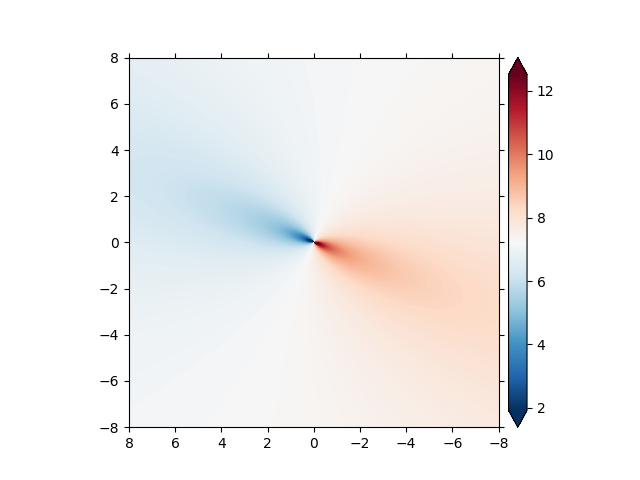

In [6]:
fig, ax = plt.subplots()

plot_2D_map(
    vlos,
    X=image.x,
    Y=image.y,
    ax=ax,
    cmap_method="pcolorfast",
    contour=False,
    cmap_kw=dict(cmap=eplot.cmap["M1"], vmin=vsys-vrange, vmax=vsys+vrange),# levels=np.linspace(vsys-vrange, vsys+vrange, 50)),
    xlim=(-8, 8),
    ylim=(-8, 8)
)

ax.set(aspect=1.0 / ax.get_data_ratio(), xlim=(8, -8), ylim=(-8, 8))

[None, (8.0, -8.0), (-8.0, 8.0)]

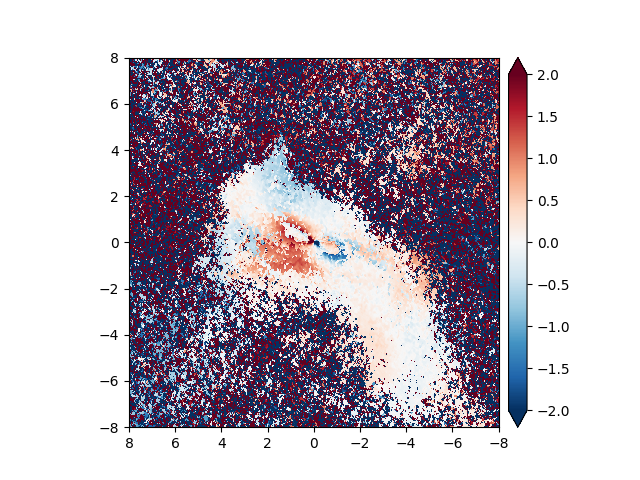

In [31]:
fig, ax = plt.subplots()

plot_2D_map(
    image.data*1e-3-vlos,
    X=image.x,
    Y=image.y,
    ax=ax,
    cmap_method="pcolorfast",
    contour=False,
    cmap_kw=dict(cmap=eplot.cmap["M1"], vmin=-2, vmax=2),# levels=np.linspace(vsys-vrange, vsys+vrange, 50)),
    xlim=(-8, 8),
    ylim=(-8, 8)
)

ax.set(aspect=1.0 / ax.get_data_ratio(), xlim=(8, -8), ylim=(-8, 8))

In [2]:
#C18O rotation map
source = "L1489IRS"
config = "SBLB"
line = "C18O"
imagename = au.customimagepath + au.get_image_basename(source, config, line, robust=1.0)

In [21]:
print(imagename)

/raid/work/yamato/edisk_data/L1489IRS/custom_images/L1489IRS_SBLB_C18O_robust_1.0.image.fits


In [7]:
from qdisk.product import calculate_moment

map = calculate_moment(
    imagename=imagename,
    moments=["q"],
    threshold=None,
    save=True,
    savefilename=au.VADPpath + au.get_image_basename(source, config, line, robust=1.0),
    nchunks=None
)


Loading data...
Estimating rms...
Generating threshold mask...
Generating channel mask...
Combining the masks...
Calculating moment q...


/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/bettermoments/quadratic.py:68: RuntimeWarning: invalid value encountered in true_divide
  x_max = idx - 0.5 * a1 / a2
/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/bettermoments/quadratic.py:69: RuntimeWarning: invalid value encountered in true_divide
  y_max = a0 - 0.25 * a1**2 / a2
/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/bettermoments/quadratic.py:109: RuntimeWarning: invalid value encountered in true_divide
  x_max_var = 0.0625*(a1**2*(df_minus + df_plus) +
/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/bettermoments/quadratic.py:113: RuntimeWarning: invalid value encountered in true_divide
  y_max_var = 0.015625*(a1**4*(df_minus + df_plus) +


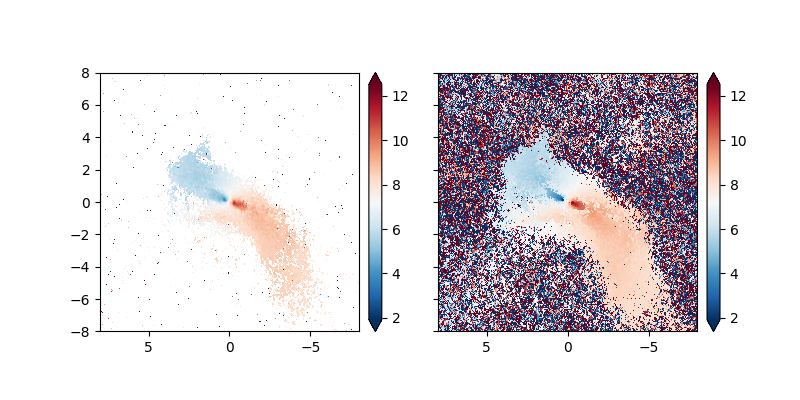

In [15]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4))

for ax, mom in zip(axes, ["M1", "v0"]):
    v0image = au.VADPpath + au.get_image_basename(source, config, line, robust=1.0).replace(
        ".fits", "_{:s}.fits".format(mom)
    )
    image = FitsImage(v0image)
    image.get_directional_coord(center_coord=center_coord)
    # image.data[(image.data*1e-3 > vsys + 2) | (image.data*1e-3 < vsys - 2)] = np.nan
    image.data *= 1e-3

    plot_2D_map(
        image.data,
        X=image.x,
        Y=image.y,
        ax=ax,
        cmap_method="pcolorfast",
        contour=False,
        cmap_kw=dict(cmap=eplot.cmap["M1"], vmin=vsys-vrange, vmax=vsys+vrange),
        xlim=(-8, 8),
        ylim=(-8, 8)
    )

    ax.set(aspect=1.0 / ax.get_data_ratio(), xlim=(8, -8), ylim=(-8, 8))


(array([ 16801.,  15822.,  15128.,  14488., 101820., 135513.,  29226.,
         13778.,  16624.,  17796.]),
 array([-2.99999996, -1.01999997,  0.96000003,  2.94000003,  4.92000003,
         6.90000003,  8.88000003, 10.86000003, 12.84000003, 14.82000003,
        16.80000003]),
 <BarContainer object of 10 artists>)

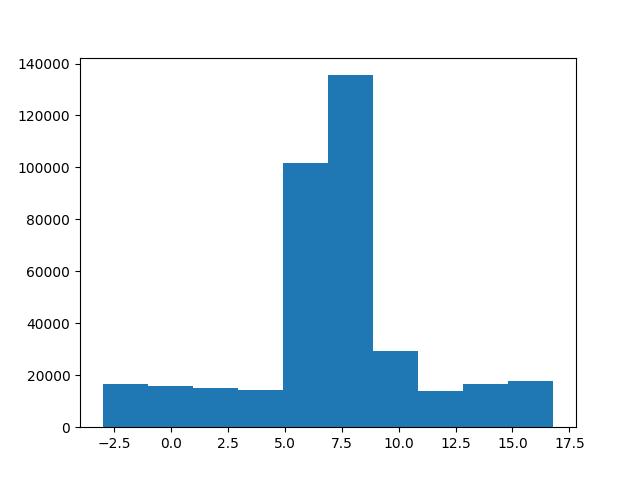

In [14]:
plt.figure()
image.get_mask(rmin=2.0, rmax=4.0)

data = image.data[image.mask].flatten()
plt.hist(data)

Loading data...
Plotting v = 1.80 km/s...
Plotting v = 2.10 km/s...
Plotting v = 2.40 km/s...
Plotting v = 2.70 km/s...
Plotting v = 3.00 km/s...
Plotting v = 3.30 km/s...
Plotting v = 3.60 km/s...
Plotting v = 3.90 km/s...
Plotting v = 4.20 km/s...
Loading data...
Plotting v = 4.80 km/s...
Plotting v = 5.10 km/s...
Plotting v = 5.40 km/s...
Plotting v = 5.70 km/s...
Plotting v = 6.00 km/s...
Plotting v = 6.30 km/s...
Plotting v = 6.60 km/s...
Plotting v = 6.90 km/s...
Plotting v = 7.20 km/s...
Loading data...
Plotting v = 7.50 km/s...
Plotting v = 7.80 km/s...
Plotting v = 8.10 km/s...
Plotting v = 8.40 km/s...
Plotting v = 8.70 km/s...
Plotting v = 9.00 km/s...
Plotting v = 9.30 km/s...
Plotting v = 9.60 km/s...
Plotting v = 9.90 km/s...
Loading data...
Plotting v = 10.50 km/s...
Plotting v = 10.80 km/s...
Plotting v = 11.10 km/s...
Plotting v = 11.40 km/s...
Plotting v = 11.70 km/s...
Plotting v = 12.00 km/s...
Plotting v = 12.30 km/s...
Plotting v = 12.60 km/s...
Plotting v = 12.90

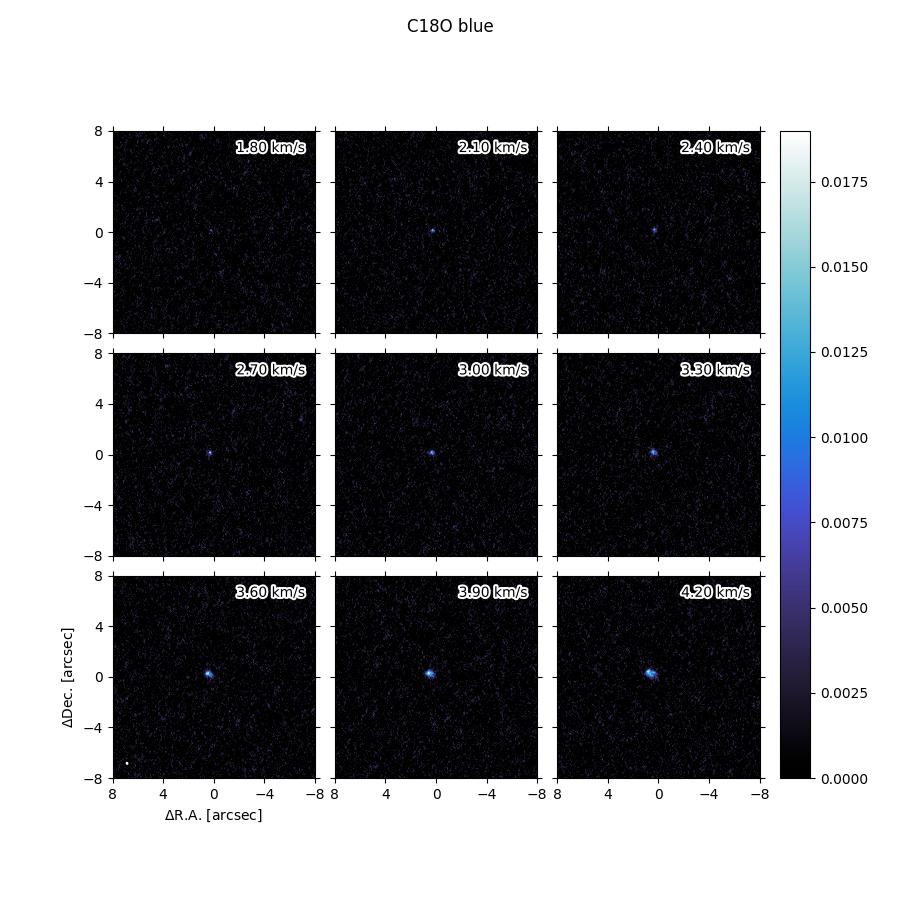

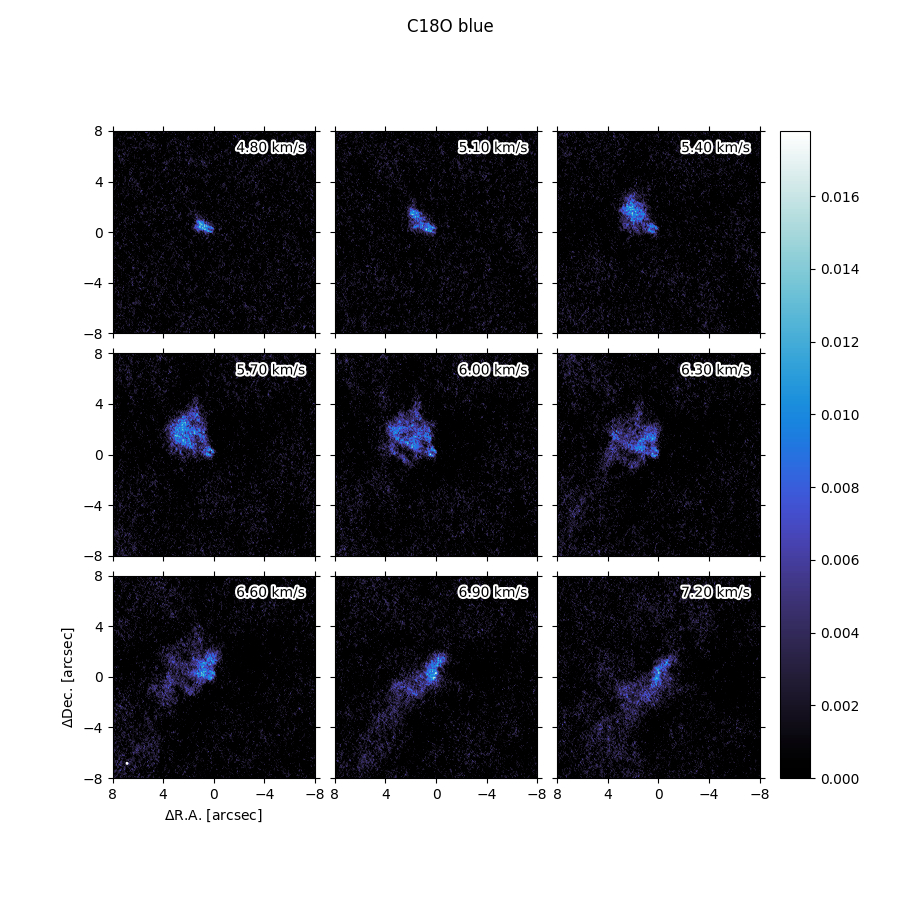

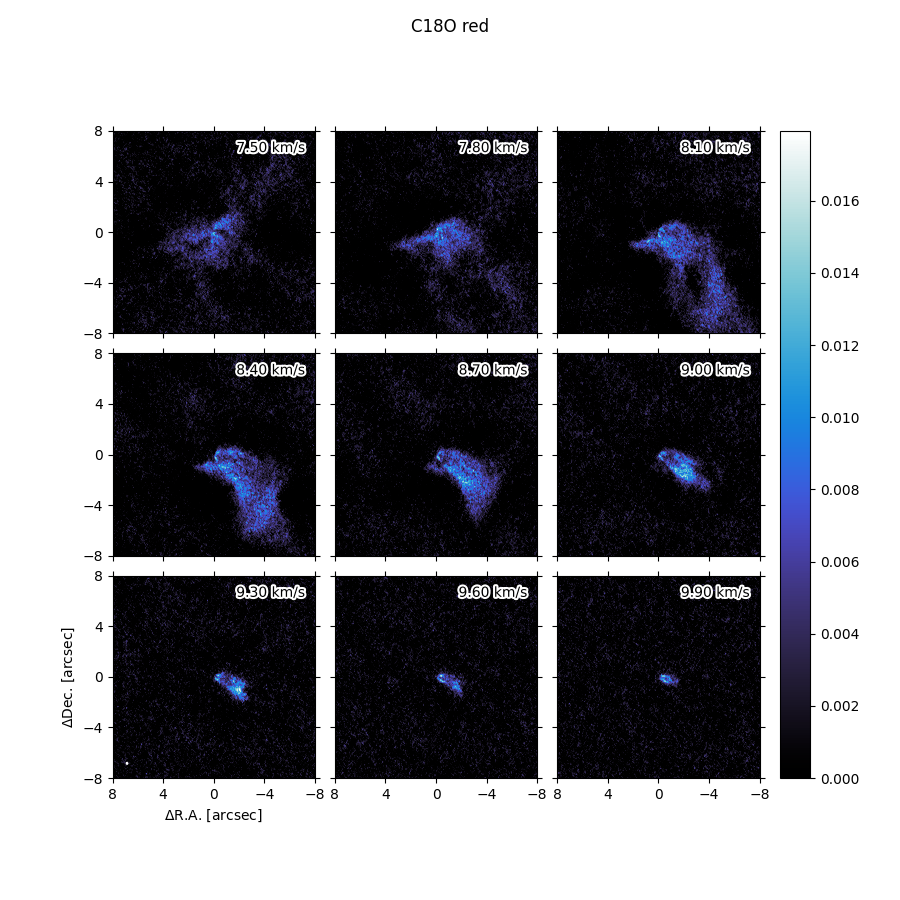

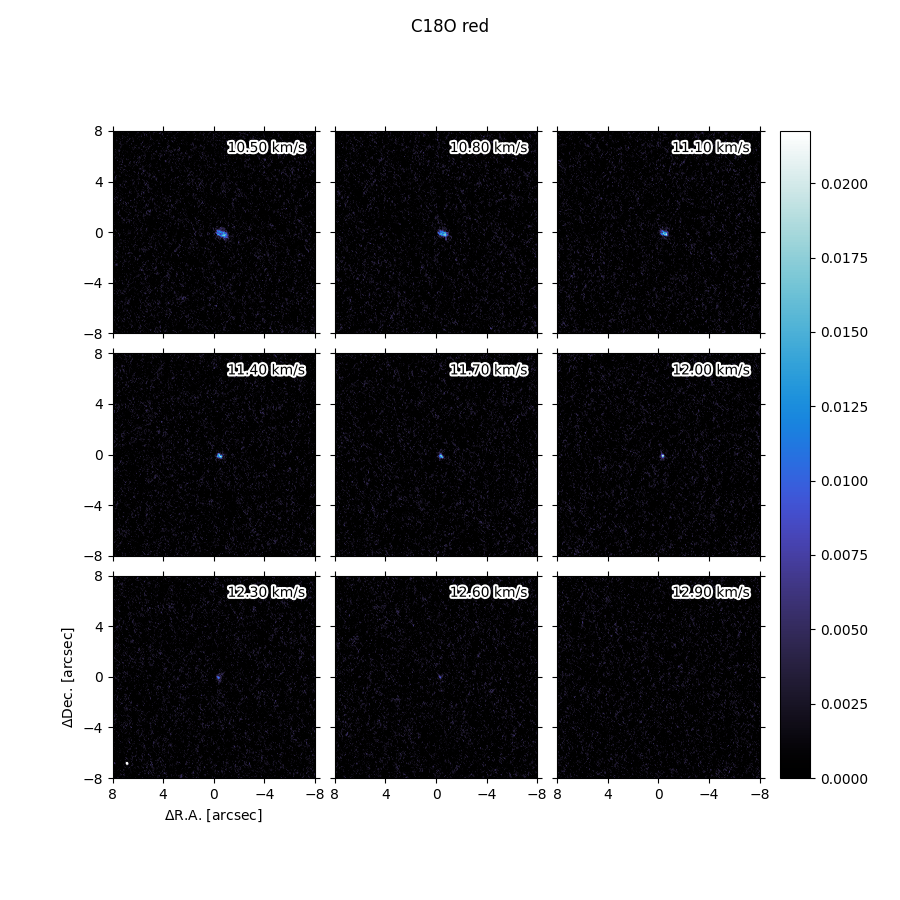

In [15]:
# channel maps
fig = plot_channel_map(imagename, center_coord=center_coord, vrange=(1.8, 4.5), rmax=8, thin=1, pad=0.2, beam_kw=dict(color="white"), cmap_kw=dict(cmap=eplot.cmap["M0"]))
fig.suptitle("C18O blue")
fig.savefig("./figure/" + au.get_image_basename(source, config, line, robust=1.0).replace(".fits", "_channelmap_blue1.png"), dpi=800, bbox_inches="tight", pad_inches=0.01)
fig = plot_channel_map(imagename, center_coord=center_coord, vrange=(4.8, vsys), rmax=8, thin=1, pad=0.2, beam_kw=dict(color="white"), cmap_kw=dict(cmap=eplot.cmap["M0"]))
fig.suptitle("C18O blue")
fig.savefig("./figure/" + au.get_image_basename(source, config, line, robust=1.0).replace(".fits", "_channelmap_blue2.png"), dpi=800, bbox_inches="tight", pad_inches=0.01)
fig = plot_channel_map(imagename, center_coord=center_coord, vrange=(vsys, 10.2), rmax=8, thin=1, pad=0.2, beam_kw=dict(color="white"), cmap_kw=dict(cmap=eplot.cmap["M0"]))
fig.suptitle("C18O red")
fig.savefig("./figure/" + au.get_image_basename(source, config, line, robust=1.0).replace(".fits", "_channelmap_red1.png"), dpi=800, bbox_inches="tight", pad_inches=0.01)
fig = plot_channel_map(imagename, center_coord=center_coord, vrange=(10.5, 13), rmax=8, thin=1, pad=0.2, beam_kw=dict(color="white"), cmap_kw=dict(cmap=eplot.cmap["M0"]))
fig.suptitle("C18O red")
fig.savefig("./figure/" + au.get_image_basename(source, config, line, robust=1.0).replace(".fits", "_channelmap_red2.png"), dpi=800, bbox_inches="tight", pad_inches=0.01)

[None,
 (1.8, -1.8),
 (-1.8, 1.8),
 Text(0.5, 0, '$\\Delta$R.A. [arcsec]'),
 Text(0, 0.5, '$\\Delta$Dec. [arcsec]')]

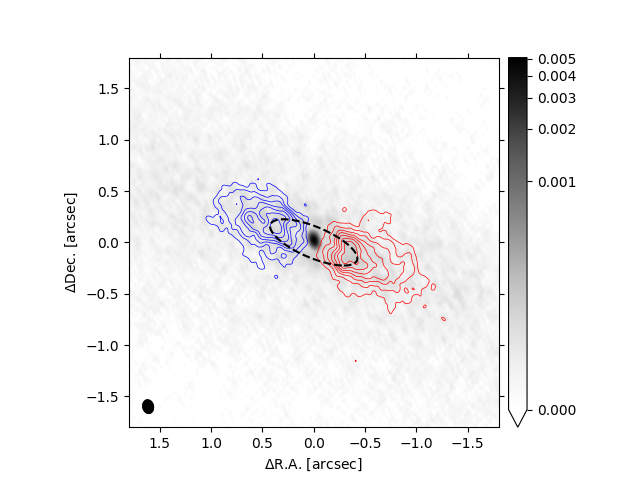

In [36]:
fig, ax = plt.subplots()

image = FitsImage(imagename)
image.get_directional_coord(center_coord=center_coord)

# blue
image.spectrally_collapse(vrange=(2, 4.8), sigma_clip=None, mode="integ")

# # measure the noise levels of collapsed
# image.get_mask(rmin=12, rmax=14)

noise = np.nanstd(image.collapsed)

plot_2D_map(
    image.collapsed,
    X=image.x,
    Y=image.y,
    ax=ax,
    # cmap=True, 
    # cmap_method="pcolorfast",
    # contour=False,
    cmap=False,
    contour=True,
    colorbar=False,
    beam=image.beam,
    beam_kw=dict(color="black"),
    contour_kw=dict(levels=np.linspace(4*noise, image.collapsed.max(), 8), colors="blue", linewidths=0.5)
)

# red
image.spectrally_collapse(vrange=(9.8, 12.7), sigma_clip=None, mode="integ")

# # measure the noise levels of collapsed
# image.get_mask(rmin=12, rmax=14)

noise = np.nanstd(image.collapsed)

plot_2D_map(
    image.collapsed,
    X=image.x,
    Y=image.y,
    ax=ax,
    # cmap=True, 
    # cmap_method="pcolorfast",
    # contour=False,
    cmap=False,
    contour=True,
    colorbar=False,
    beam=image.beam,
    beam_kw=dict(color="black", fill=True, linewidths=0.5),
    contour_kw=dict(levels=np.linspace(4*noise, image.collapsed.max(), 8), colors="red", linewidths=0.5)
)

contimagename = au.imageproductpath + au.get_image_basename(source, config, "continuum", robust=1.0)
contimage = FitsImage(contimagename)
contimage.get_directional_coord(center_coord=center_coord)
plot_2D_map(contimage.data, X=contimage.x, Y=contimage.y, ax=ax, cmap=True, cmap_method="pcolorfast", contour=False, cmap_kw=dict(cmap="Greys", norm=ImageNormalize(vmin=0.0, stretch=AsinhStretch(a=0.02))))

# ring position
contimage.get_projected_coord(PA=source_dict[source]["PA"], incl=source_dict[source]["incl"], center_coord=center_coord)
ax.contour(contimage.x, contimage.y, contimage.r, levels=np.array([0.456]), linestyles="dashed", colors="black")

ax.set(aspect=1./ax.get_data_ratio(), xlim=(1.8, -1.8), ylim=(-1.8, 1.8), xlabel="$\Delta$R.A. [arcsec]", ylabel="$\Delta$Dec. [arcsec]")

In [37]:
fig.savefig("./figure/"+source+"_C18O_highVMom0_2.0-4.8_9.8-12.7_continuum_comparison.png", dpi=500, bbox_inches="tight", pad_inches=0.01)

[None,
 (8.0, -8.0),
 (-8.0, 8.0),
 Text(0.5, 0, '$\\Delta$R.A. [arcsec]'),
 Text(0, 0.5, '$\\Delta$Dec. [arcsec]')]

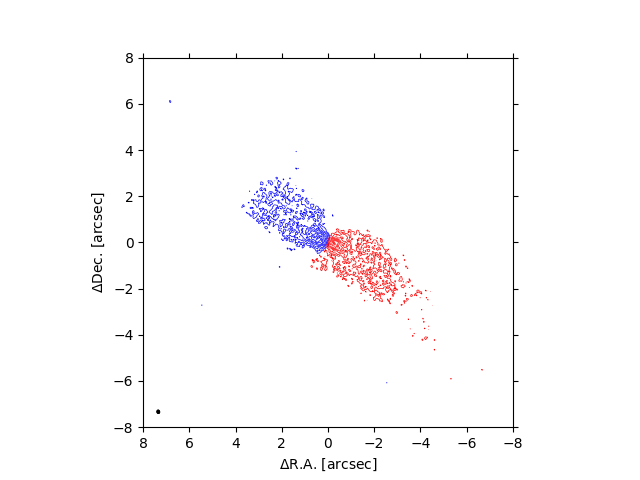

In [40]:
fig, ax = plt.subplots()

image = FitsImage(imagename)
image.get_directional_coord(center_coord=center_coord)

# blue
image.spectrally_collapse(vrange=(2, vsys), sigma_clip=None, mode="integ")

# # measure the noise levels of collapsed
# image.get_mask(rmin=12, rmax=14)

noise = np.nanstd(image.collapsed)

plot_2D_map(
    image.collapsed,
    X=image.x,
    Y=image.y,
    ax=ax,
    # cmap=True, 
    # cmap_method="pcolorfast",
    # contour=False,
    cmap=False,
    contour=True,
    colorbar=False,
    beam=image.beam,
    beam_kw=dict(color="black"),
    contour_kw=dict(levels=np.linspace(4*noise, image.collapsed.max(), 8), colors="blue", linewidths=0.5)
)

# red
image.spectrally_collapse(vrange=(vsys, 12.7), sigma_clip=None, mode="integ")

# # measure the noise levels of collapsed
# image.get_mask(rmin=12, rmax=14)

noise = np.nanstd(image.collapsed)

plot_2D_map(
    image.collapsed,
    X=image.x,
    Y=image.y,
    ax=ax,
    # cmap=True, 
    # cmap_method="pcolorfast",
    # contour=False,
    cmap=False,
    contour=True,
    colorbar=False,
    beam=image.beam,
    beam_kw=dict(color="black", fill=True, linewidths=0.5),
    contour_kw=dict(levels=np.linspace(4*noise, image.collapsed.max(), 8), colors="red", linewidths=0.5)
)

ax.set(aspect=1./ax.get_data_ratio(), xlim=(8, -8), ylim=(-8, 8), xlabel="$\Delta$R.A. [arcsec]", ylabel="$\Delta$Dec. [arcsec]")

In [20]:
contimage.data.shape

(6000, 6000)

In [3]:
7/1.4

5.0

In [27]:
from eddy import rotationmap

In [49]:
cube = rotationmap(
    path="./VADP/L1489IRS_SBLB_C18O_robust_1.0.image_v0.fits",
    uncertainty="./VADP/L1489IRS_SBLB_C18O_robust_1.0.image_dv0.fits",
    downsample=2,
    FOV=4.0,
)


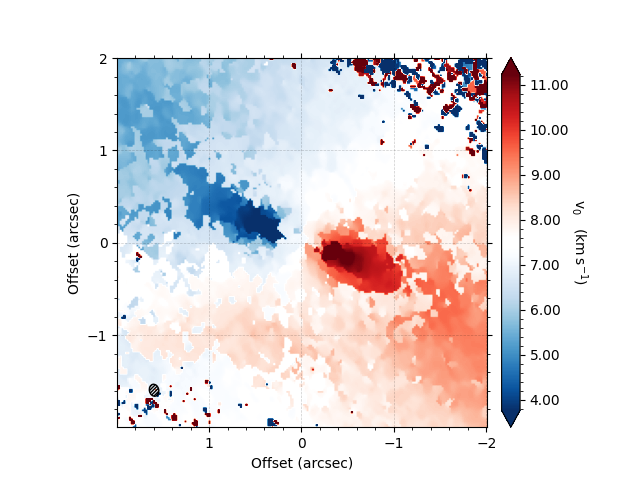

In [50]:
cube.plot_data()

In [55]:
params = {}

params["x0"] = 0.0
params["y0"] = 0.0
params["PA"] = 0
params["mstar"] = 1
params["inc"] = 2
params["vlsr"] = 3

p0 = [290, 1.6, 70, 7.2]

params["dist"] = 146.0

Assuming:
	p0 = [PA, mstar, inc, vlsr].
Starting positions:
	p0 = ['2.90e+02', '1.60e+00', '7.00e+01', '7.20e+00']


/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
100%|██████████| 2000/2000 [04:00<00:00,  8.33it/s]
/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/eddy/rotationmap.py:1724: UserWarning: No contour levels were found within the data range.
  ax.contour(self.xaxis, self.yaxis, mask,
/home/yamato/Project/eDisk/firstlook_L1489IRS/.venv/lib/python3.8/site-packages/eddy/rotationmap.py:1796: UserWarning: No contour levels were fo

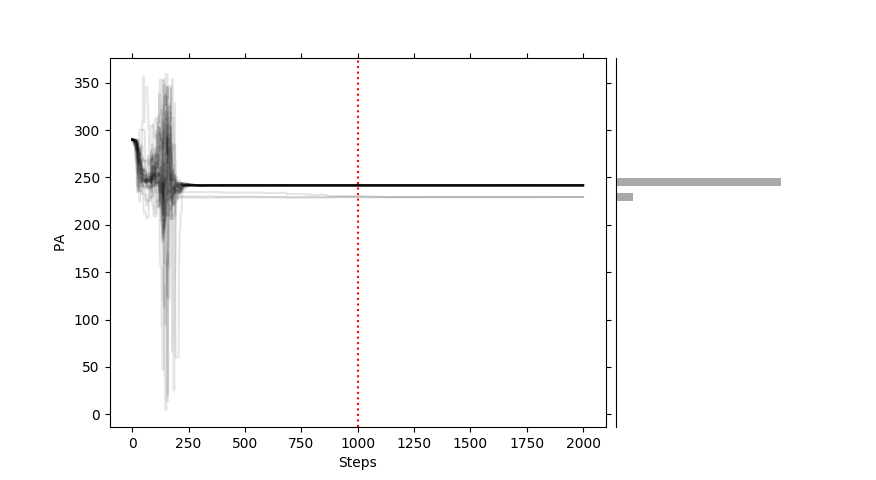

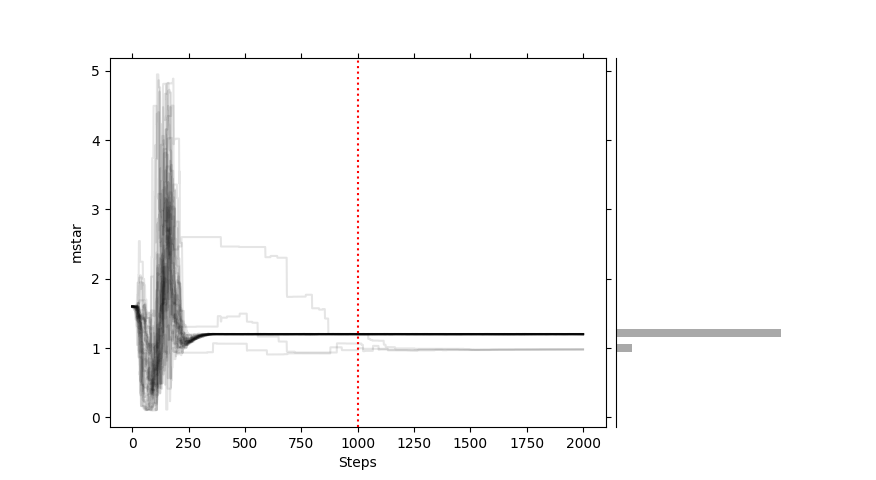

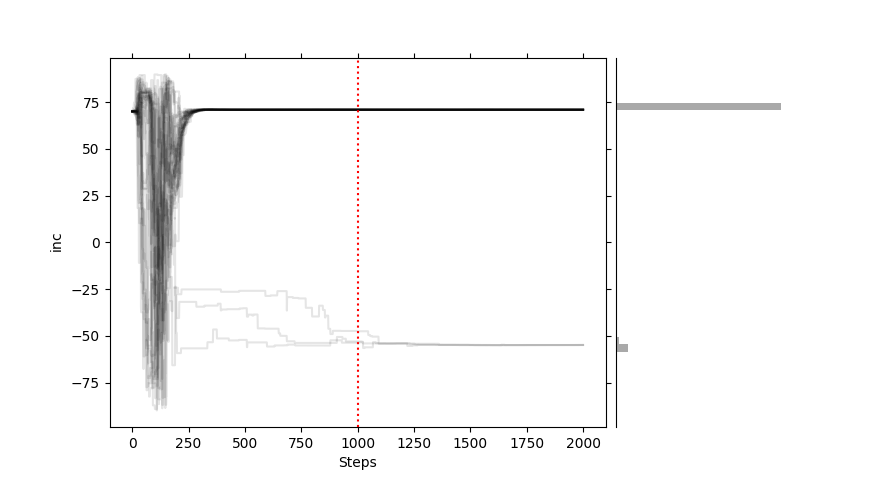

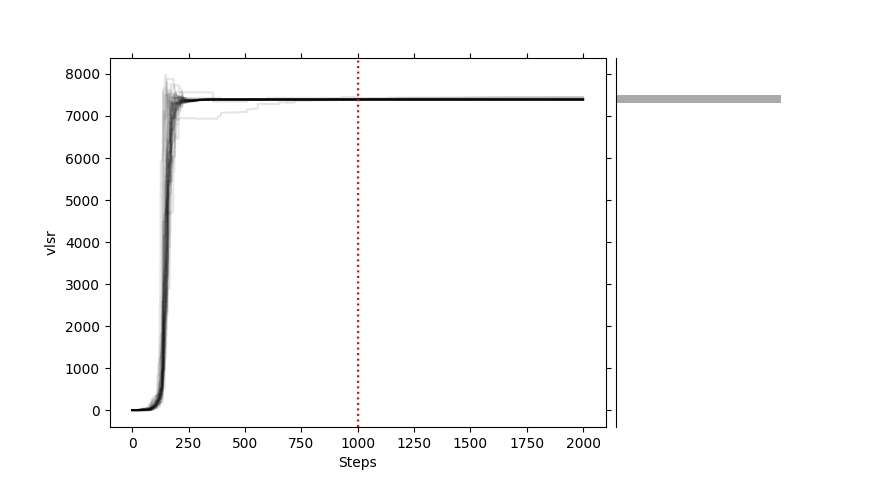

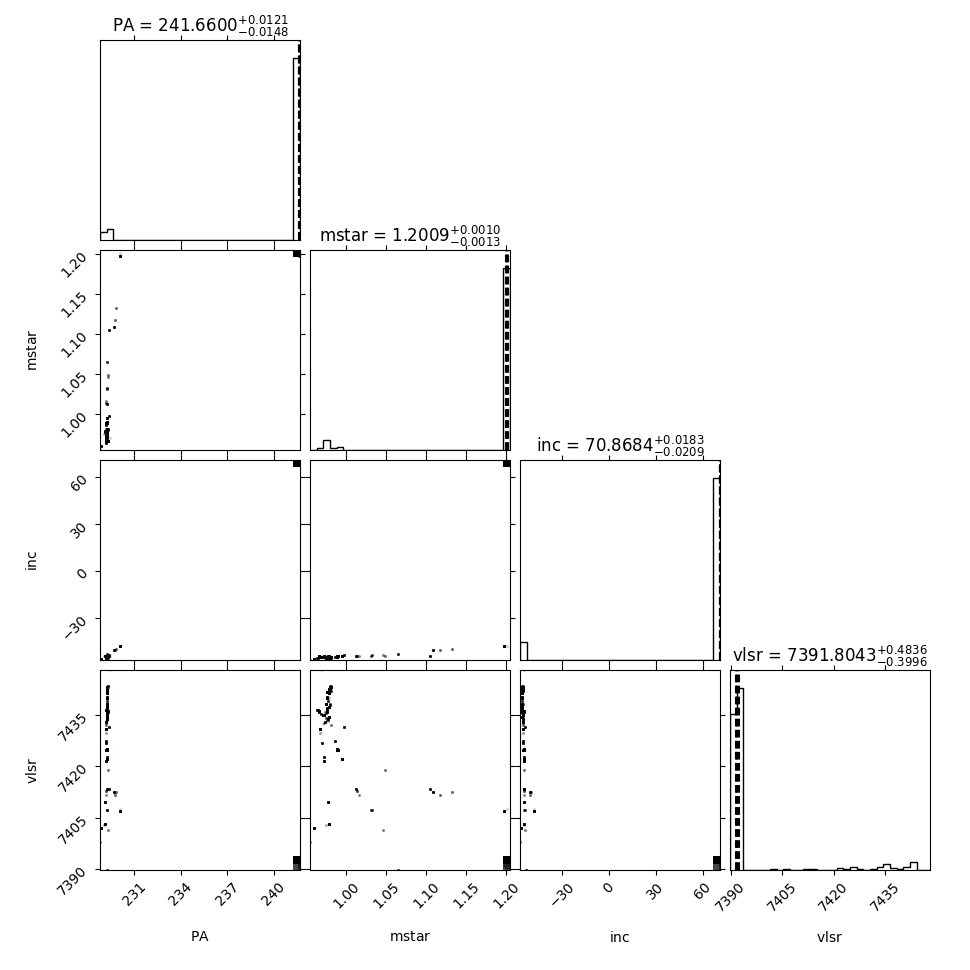

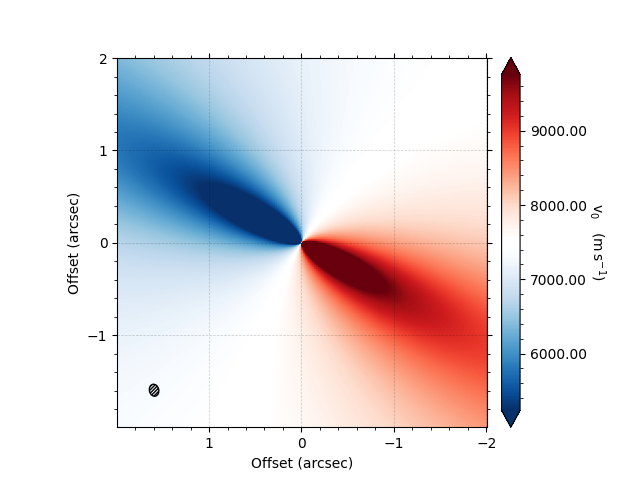

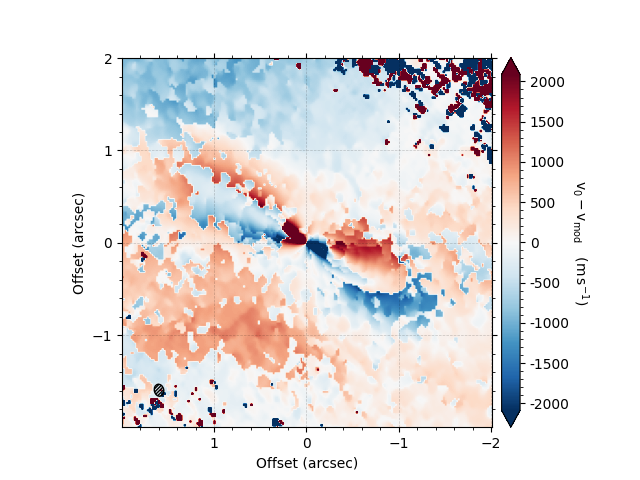

In [56]:
samples = cube.fit_map(p0=p0, params=params, nwalkers=32, nburnin=1000, nsteps=1000)